<a href="https://www.kaggle.com/code/kagglepraveen123456/alexnet-on-tomato-update?scriptVersionId=106293976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/MOTURUPRAVEENBHARGAV/Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods.git

Cloning into 'Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods'...
remote: Enumerating objects: 18191, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 18191 (delta 2), reused 8 (delta 2), pack-reused 18183
Receiving objects: 100% (18191/18191), 271.56 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (18161/18161), done.


In [3]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
# img_path = "/Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Train/Bacterial_spot/Bacterial_spot1.jpg"
# img = load_img(img_path)
# imshow(img)

# x = img_to_array(img)
# x = np.expand_dims(x, axis=0)
# # print(x)
# print(f"The size of the Sample IMAGE is : {x.shape}")

Training Data Set

In [5]:
DATASET="./Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Train"

CATEGORIES=["Bacterial_spot","Early_blight","healthy","Late_blight","Leaf_Mold","Septoria_leaf_spot","Spider_mite","Target_Spot","Mosaic_virus","Yellow_Leaf_Curl_Virus"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=450):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [6]:
len(train_data)

4500

Test Data

In [7]:
test_data=[]
DATASET2="./Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Test"
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            test_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

4500
1000


In [8]:
print(f"The shape of the Training Data:\n")
train_data[0][0].shape

The shape of the Training Data:



(128, 128, 3)

Validation Data

In [9]:
val_data=[]
DATASET2="./Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Val"
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            val_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))
print(len(val_data))# size of validation dataset

4500
1000
1000


Performing Train_Test_Val splitting

In [10]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [11]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)

(4500, 4500)

In [12]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(1000, 1000)

In [13]:
X_val=[]
y_val=[]

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)
    
Z=[]
for i in y_val:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_val),len(y_val)

(1000, 1000)

In [14]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
print(X_train.shape)

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
print(X_test.shape)

X_val=np.array(X_val).reshape(-1,128,128,3)
X_val=X_val/255.0
print(X_val.shape)


(4500, 128, 128, 3)
(1000, 128, 128, 3)
(1000, 128, 128, 3)


One hot Encoding the labels of Train, Test, Val

In [15]:
y_train=to_categorical(y_train)


y_test=to_categorical(y_test)
y_val = to_categorical(y_val)

Creating VGG19 MODEL

In [16]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [17]:
AlexNet_model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
AlexNet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

AlexNet_model.summary()

2022-09-22 14:58:56.791082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

2022-09-22 14:58:56.877177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 14:58:56.878032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 14:58:56.879435: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 14:58:56.879816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

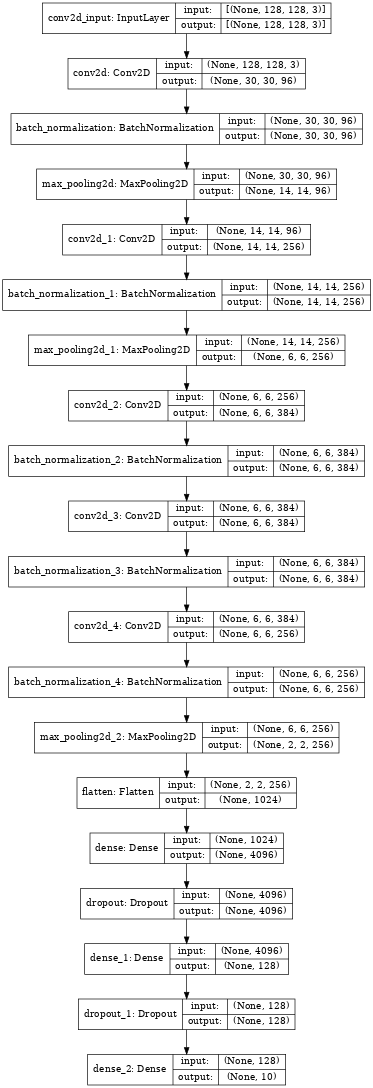

In [18]:
import tensorflow as tf
tf.keras.utils.plot_model(AlexNet_model, show_shapes=True, dpi=48)

In [19]:
X_train[0].shape

(128, 128, 3)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    filepath="AlexNet_model_on_tomato.h5",
    verbose=3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# early_stopping= EarlyStopping(monitor="val_loss",patience=4,verbose=3,mode="min")

reducelrplateau= ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=3,patience=2,mode="min", min_lr=0.0001)


hist=AlexNet_model.fit(X_train,y_train,epochs=100,batch_size=128,validation_split=0.2,callbacks= [model_checkpoint,reducelrplateau])

2022-09-22 14:59:00.565146: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 707788800 exceeds 10% of free system memory.
2022-09-22 14:59:01.384708: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 707788800 exceeds 10% of free system memory.
2022-09-22 14:59:01.964631: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-22 14:59:03.929346: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


29/29 [==============================] - 10s 66ms/step - loss: 2.6765 - accuracy: 0.2269 - val_loss: 2.3027 - val_accuracy: 0.0933

Epoch 00001: val_accuracy improved from -inf to 0.09333, saving model to AlexNet_model_on_tomato.h5
Epoch 2/100
29/29 [==============================] - 1s 38ms/step - loss: 1.9582 - accuracy: 0.3075 - val_loss: 2.2892 - val_accuracy: 0.0944

Epoch 00002: val_accuracy improved from 0.09333 to 0.09444, saving model to AlexNet_model_on_tomato.h5
Epoch 3/100
29/29 [==============================] - 1s 38ms/step - loss: 1.8283 - accuracy: 0.3517 - val_loss: 2.3538 - val_accuracy: 0.0756

Epoch 00003: val_accuracy did not improve from 0.09444
Epoch 4/100
29/29 [==============================] - 1s 37ms/step - loss: 1.6881 - accuracy: 0.4264 - val_loss: 2.8568 - val_accuracy: 0.0589

Epoch 00004: val_accuracy did not improve from 0.09444

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/100
29/29 [=========================

In [21]:
AlexNet_model.load_weights('./AlexNet_model_on_tomato.h5')
# VGG19_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN PROJECTS/MTech Research<Project>/MODELS/VGG19/VGG19_model_on_tomato.h5')

In [22]:
test_loss,test_acc=AlexNet_model.evaluate(X_test,y_test)
test_loss,test_acc

32/32 [==============================] - 0s 9ms/step - loss: 0.7499 - accuracy: 0.8760


(0.7499195337295532, 0.8759999871253967)

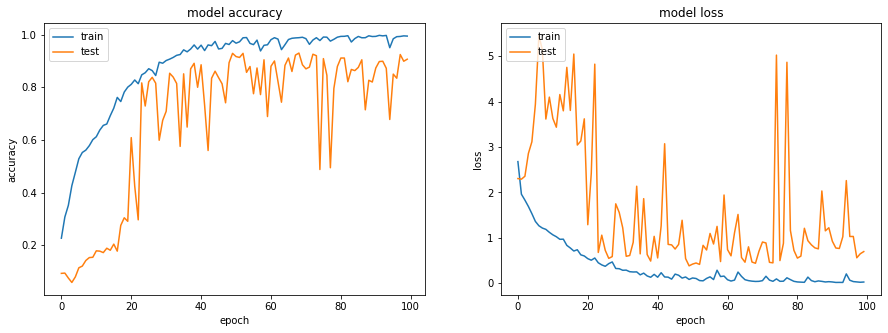

In [23]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_pred=AlexNet_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)



In [25]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [26]:
y_test= np.argmax(y_test,axis=-1)

In [27]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[92,  3,  0,  1,  0,  1,  0,  0,  0,  3],
       [ 6, 67,  0,  9,  5,  5,  0,  3,  0,  5],
       [ 1,  0, 92,  3,  0,  0,  0,  4,  0,  0],
       [ 2,  6,  0, 79,  3,  6,  1,  1,  0,  2],
       [ 0,  3,  0,  0, 95,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  2,  7, 87,  0,  1,  2,  0],
       [ 0,  2,  0,  0,  0,  4, 84,  9,  1,  0],
       [ 0,  4,  0,  0,  0,  2,  8, 86,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0, 97,  0],
       [ 1,  0,  0,  1,  0,  1,  0,  0,  0, 97]])

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


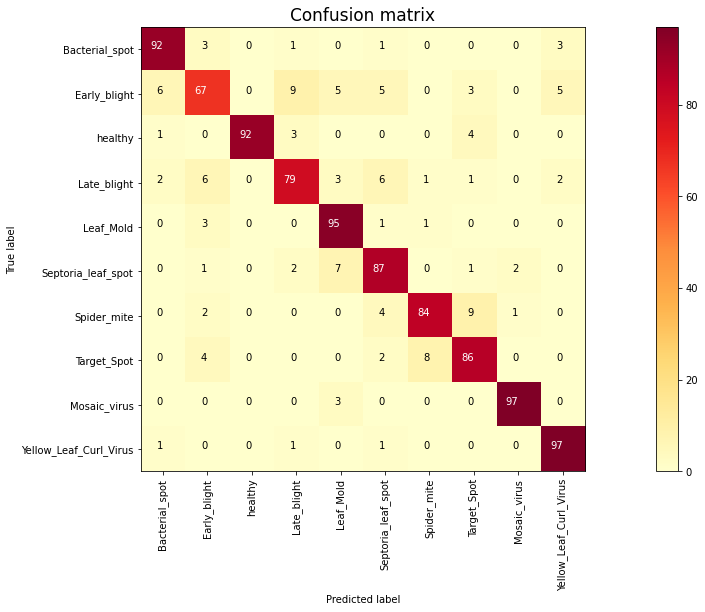

In [29]:
import itertools
plt.figure(figsize=(20,7))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("confusion_matrix.jpg")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=CATEGORIES))

                        precision    recall  f1-score   support

        Bacterial_spot       0.90      0.92      0.91       100
          Early_blight       0.78      0.67      0.72       100
               healthy       1.00      0.92      0.96       100
           Late_blight       0.83      0.79      0.81       100
             Leaf_Mold       0.84      0.95      0.89       100
    Septoria_leaf_spot       0.81      0.87      0.84       100
           Spider_mite       0.89      0.84      0.87       100
           Target_Spot       0.83      0.86      0.84       100
          Mosaic_virus       0.97      0.97      0.97       100
Yellow_Leaf_Curl_Virus       0.91      0.97      0.94       100

              accuracy                           0.88      1000
             macro avg       0.88      0.88      0.87      1000
          weighted avg       0.88      0.88      0.87      1000



In [31]:
sample_pred=AlexNet_model.predict(np.array(X_test[0]).reshape(-1,128,128,3))
sample_pred = np.argmax(sample_pred, axis=-1)
sample_pred

array([5])

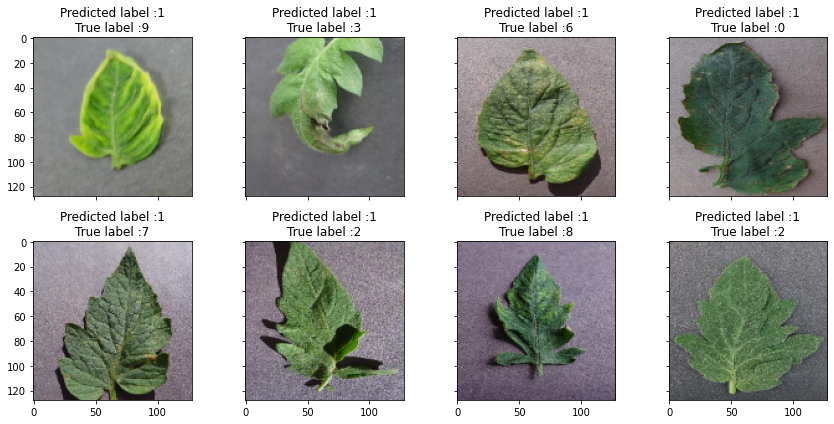

In [32]:
#Monitoring the model_performance with its predictions and labels
plt.rcParams["figure.figsize"] = (13,6)
n = 0
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)

for row in range(nrows):
    for col in range(ncols):

        test_image,true_label = random.choice(test_data) #Make Sure your test image size would be (-1,128,128,3)
        
        ax[row,col].imshow(test_image)
        sample_pred =  AlexNet_model.predict(np.array(test_image).reshape(-1,128,128,3))
        pred_label = np.argmax(sample_pred,axis=-1)[0]
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_label,true_label))
        n += 1
        plt.tight_layout()
plt.show()
        

# for i in range(0,7):
#     plt.figure(figsize=(10,10))
#     plt.subplot(1,7,i+1)
#     test_image,true_label = random.choice(test_data)
#     plt.imshow(test_image)
#     plt.label
# #     print(true_label)
#     plt.show()